In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer_dataset = load_breast_cancer()
cancer_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_dataset.data, 
    cancer_dataset.target, 
    stratify=cancer_dataset.target,
    random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [5]:
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [6]:
train_predict = model.predict(X_train)
train_acc = np.sum(y_train == train_predict) / y_train.shape[0]

test_predict = model.predict(X_test)
test_acc = np.sum(y_test == test_predict) / y_test.shape[0]

print('train acc:', train_acc)
print('test acc:', test_acc)

train acc: 1.0
test acc: 0.916083916083916


In [7]:
# You need to install tool 'graphviz' and then to install python library 'graphviz'
from sklearn.tree import export_graphviz
export_graphviz(model, 
                out_file='dtree.dot', 
                class_names=['malignant', 'benign'], 
                feature_names=cancer_dataset.feature_names, filled=True)
# The output file "dtree.dot" can be converted to a png file by
# typing "dot -Tpng dtree.dot -o dtree.png" in a terminal and 
# opening the generated "dtree.png" 
# (dot is a terminal interface of graphviz)

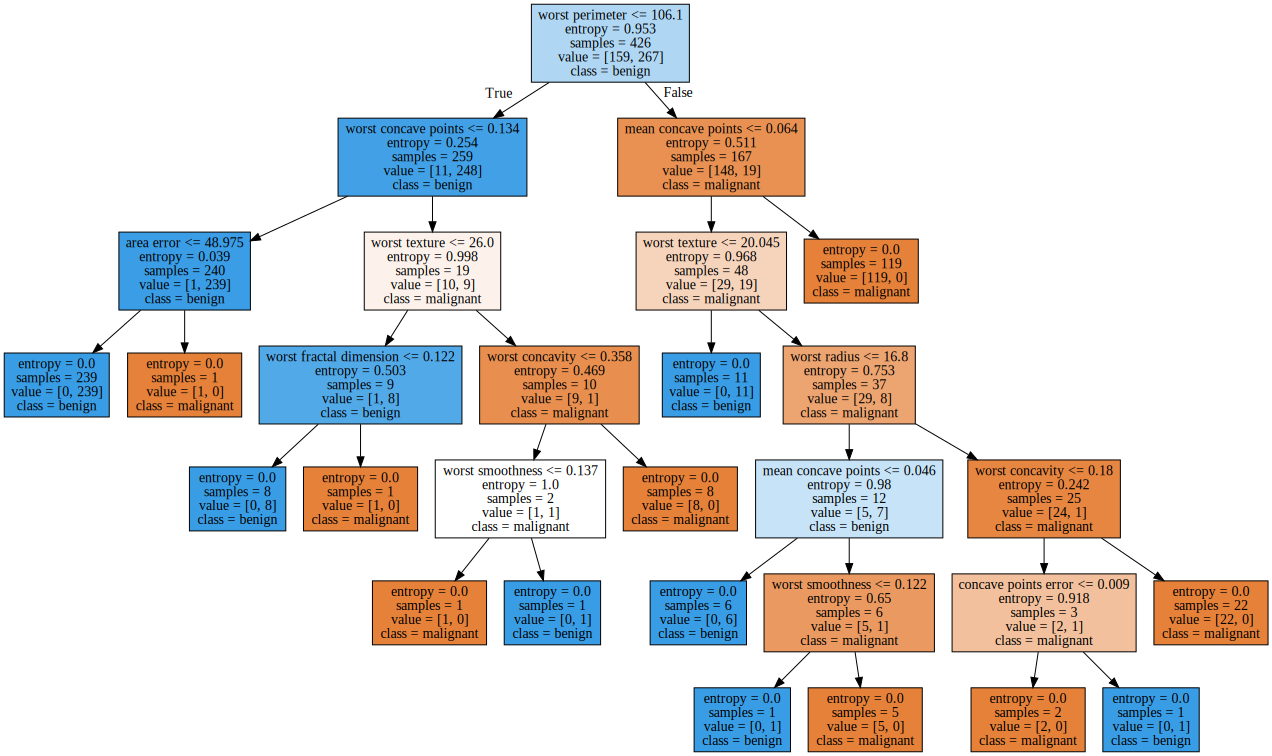

In [8]:
import graphviz 

with open('dtree.dot') as f:
    graph = f.read()
    display(graphviz.Source(graph))

In [9]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
model.fit(X_train, y_train)

train_predict = model.predict(X_train)
train_acc = np.sum(y_train == train_predict) / y_train.shape[0]

test_predict = model.predict(X_test)
test_acc = np.sum(y_test == test_predict) / y_test.shape[0]

print('train acc:', train_acc)
print('test acc:', test_acc)

train acc: 0.9835680751173709
test acc: 0.9300699300699301


In [10]:
model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4, random_state=0)
model.fit(X_train, y_train)

train_predict = model.predict(X_train)
train_acc = np.sum(y_train == train_predict) / y_train.shape[0]

test_predict = model.predict(X_test)
test_acc = np.sum(y_test == test_predict) / y_test.shape[0]

print('train acc:', train_acc)
print('test acc:', test_acc)

train acc: 0.9882629107981221
test acc: 0.9440559440559441


In [11]:
# Random forests

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
train_predict = rf.predict(X_train)
train_acc = np.sum(y_train == train_predict) / y_train.shape[0]

test_predict = rf.predict(X_test)
test_acc = np.sum(y_test == test_predict) / y_test.shape[0]

print('train acc:', train_acc)
print('test acc:', test_acc)

train acc: 1.0
test acc: 0.951048951048951
